In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
LaCrimeDF = pd.read_csv("LaCrime2.csv")
LaWeatherDF = pd.read_csv("LaWeather.csv")

In [3]:
LaCrimeDF.head()
# Raw Crime table


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [4]:
LaWeatherDF.head()
# Raw Weather Table

,Station,Date,Time,Interval,Air max,Air max time,Air min,Air min time,Air avg,RH avg,Precip,Chill hrs,Hrs 32F,Hrs 85F,Hrs 95F
0,20140101,2400,1440,67,14:50,27,05:14,42,76,0.00,15.2,6.9,0.0,0.00,NaN
1,20140102,2400,1440,66,14:07,29,06:01,44,75,0.00,14.3,3.3,0.0,0.00,NaN
2,20140103,2400,1440,63,14:23,29,05:37,43,79,0.00,15.4,3.2,0.0,0.00,NaN
3,20140104,2400,1440,66,15:04,29,05:17,44,76,0.00,14.0,3.4,0.0,0.00,NaN
4,20140105,2400,1440,68,15:17,28,07:01,44,78,0.00,14.1,3.3,0.0,0.00,NaN


In [5]:
# Clean crime columns
# del LaCrimeDF["AREA"]

del LaCrimeDF["AREA NAME"]
del LaCrimeDF["Rpt Dist No"]
del LaCrimeDF["Crm Cd 2"]
del LaCrimeDF["Crm Cd 3"]
del LaCrimeDF["Crm Cd 4"]
del LaCrimeDF["LOCATION"]
del LaCrimeDF["Cross Street"]
del LaCrimeDF["LAT"]
del LaCrimeDF["Status"]
del LaCrimeDF["Status Desc"]
del LaCrimeDF["LON"]
del LaCrimeDF["Weapon Desc"]
del LaCrimeDF["Weapon Used Cd"] 
del LaCrimeDF["Premis Desc"]
del LaCrimeDF["Vict Descent"]
del LaCrimeDF["Vict Sex"]
del LaCrimeDF["Vict Age"]
del LaCrimeDF["Date Rptd"]
del LaCrimeDF["Part 1-2"]
LaCrimeDF.head()

,DR_NO,DATE OCC,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1
0,1307355,02/20/2010 12:00:00 AM,1350,13,900,VIOLATION OF COURT ORDER,0913 1814 2000,501.0,900.0
1,11401303,09/12/2010 12:00:00 AM,45,14,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,101.0,740.0
2,70309629,08/09/2010 12:00:00 AM,1515,13,946,OTHER MISCELLANEOUS CRIME,0344,103.0,946.0
3,90631215,01/05/2010 12:00:00 AM,150,6,900,VIOLATION OF COURT ORDER,1100 0400 1402,101.0,900.0
4,100100501,01/02/2010 12:00:00 AM,2100,1,122,"RAPE, ATTEMPTED",0400,103.0,122.0


In [6]:
# Clean Weather columns
# del LaWeatherDF["Station"]
del LaWeatherDF["Time"]
del LaWeatherDF["Date"]
del LaWeatherDF["Air max"]
del LaWeatherDF["Air min"]
del LaWeatherDF["RH avg"]
del LaWeatherDF["Precip"]
del LaWeatherDF["Chill hrs"]
del LaWeatherDF["Hrs 32F"]
del LaWeatherDF["Hrs 85F"]
del LaWeatherDF["Hrs 95F"]
del LaWeatherDF["Air avg"]


In [7]:
LaWeatherDF.rename(columns={'Station': 'Date', 'Interval': 'Temp Max','Air max time': 'Temp Min', 'Air min time':'Temp Avg'}, inplace=True)
LaWeatherDF.head()

,Date,Temp Max,Temp Min,Temp Avg
0,20140101,67,27,42
1,20140102,66,29,44
2,20140103,63,29,43
3,20140104,66,29,44
4,20140105,68,28,44


In [8]:
LaCrimeDF["Date"] = pd.to_datetime(LaCrimeDF["DATE OCC"]).dt.date
LaCrimeDF.head()
del LaCrimeDF["DATE OCC"]

In [9]:
year = []
month = []
day = []
for ind in LaWeatherDF.index:
    take = LaWeatherDF.loc[ ind,'Date']
    year.append(int(str(take)[:4]))
    month.append(int(str(take)[4:-2]))
    day.append(int(str(take)[6:]))
LaWeatherDF['Year'] = year
LaWeatherDF['Month'] = month
LaWeatherDF['Day'] = day
LaWeatherDF.head()        

,Date,Temp Max,Temp Min,Temp Avg,Year,Month,Day
0,20140101,67,27,42,2014,1,1
1,20140102,66,29,44,2014,1,2
2,20140103,63,29,43,2014,1,3
3,20140104,66,29,44,2014,1,4
4,20140105,68,28,44,2014,1,5


In [10]:
for ind in LaWeatherDF.index:
    take = LaWeatherDF.loc[ ind,'Date']
    if((int(str(take)[:4]) < 2010) or (int(str(take)[:4]) > 2017)):
        LaWeatherDF.drop(ind)
    

In [11]:
LaCrimeDF.head()


,DR_NO,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Date
0,1307355,1350,13,900,VIOLATION OF COURT ORDER,0913 1814 2000,501.0,900.0,2010-02-20
1,11401303,45,14,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,101.0,740.0,2010-09-12
2,70309629,1515,13,946,OTHER MISCELLANEOUS CRIME,0344,103.0,946.0,2010-08-09
3,90631215,150,6,900,VIOLATION OF COURT ORDER,1100 0400 1402,101.0,900.0,2010-01-05
4,100100501,2100,1,122,"RAPE, ATTEMPTED",0400,103.0,122.0,2010-01-02


In [12]:
CrimeCategory = LaCrimeDF["Crm Cd Desc"].value_counts()
print(CrimeCategory)
LaCrimeDF.shape

BATTERY - SIMPLE ASSAULT                                   190569
BURGLARY FROM VEHICLE                                      162184
VEHICLE - STOLEN                                           159903
THEFT PLAIN - PETTY ($950 & UNDER)                         149910
BURGLARY                                                   147731
                                                            ...  
BLOCKING DOOR INDUCTION CENTER                                  3
TRAIN WRECKING                                                  2
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        2
DRUNK ROLL - ATTEMPT                                            1
FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)         1
Name: Crm Cd Desc, Length: 142, dtype: int64


(2119797, 9)

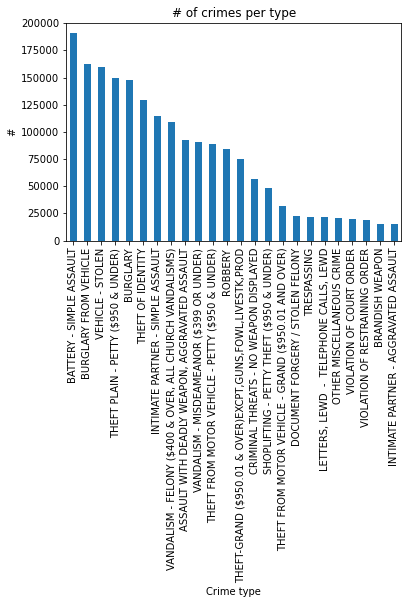

In [13]:
shw = LaCrimeDF[-LaCrimeDF['Crm Cd Desc'].isin(CrimeCategory[CrimeCategory < 15000].index)]
ax = (shw["Crm Cd Desc"].value_counts()).plot(title="# of crimes per type", kind = "bar")
ax.set_xlabel("Crime type")
ax.set_ylabel("#")
plt.xticks(rotation=90)
plt.show()

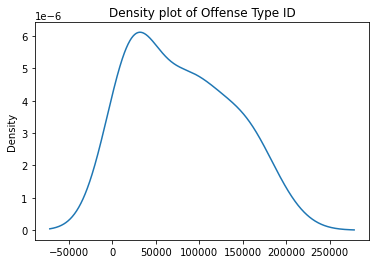

In [14]:
ax2 =(shw["Crm Cd Desc"].value_counts()).plot.kde(title="Density plot of Offense Type ID")

In [15]:
LaCrimeDF["Report Month"] = pd.DatetimeIndex(LaCrimeDF["Date"]).month
LaCrimeDF["Report Year"] = pd.DatetimeIndex(LaCrimeDF["Date"]).year
LaCrimeDF["Report Day"] = pd.DatetimeIndex(LaCrimeDF["Date"]).day

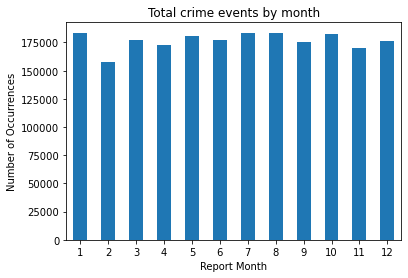

In [16]:
ax = LaCrimeDF.groupby("Report Month").size().plot(kind = "bar", title= "Total crime events by month")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

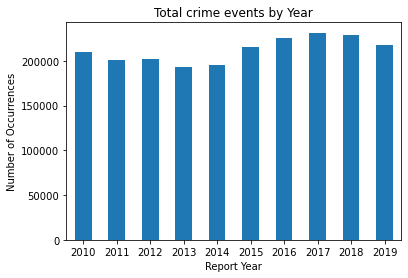

In [17]:
ax = LaCrimeDF.groupby("Report Year").size().plot(kind = "bar", title= "Total crime events by Year")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

In [18]:
# plt.scatter(LaWeatherDF["Month"], LaWeatherDF["Temp Avg"])
# plt.show()

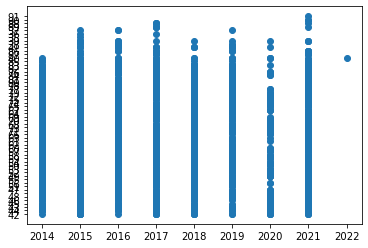

In [19]:
plt.scatter(LaWeatherDF["Year"], LaWeatherDF["Temp Avg"])
plt.show()

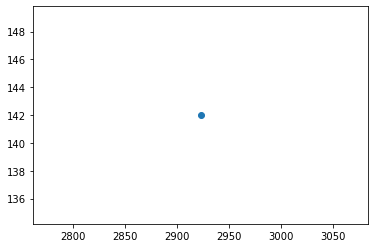

In [20]:
plt.scatter(len(LaWeatherDF["Temp Avg"].index), len(CrimeCategory.index))
plt.show()

In [21]:
ntemp = []
for ind in LaCrimeDF.index:
    for ind2 in LaWeatherDF.index:
        tep = LaCrimeDF.loc[ ind,'Report Year']
        tep2 = LaWeatherDF.loc[ ind2,'Year']
        tep3 = LaCrimeDF.loc[ ind,'Report Month']
        tep4 = LaWeatherDF.loc[ ind2,'Month']
        tep5 = LaCrimeDF.loc[ ind,'Report Day']
        tep6 = LaWeatherDF.loc[ ind2,'Day']
        if((tep == tep2) and (tep3 == tep4) and (tep5 == tep6)):
            ntemp.append(LaWeatherDF.loc[ind2,'Temp Avg'])
LaCrimeDF['Avg Temp'] = ntemp
            

KeyboardInterrupt: 